In [1]:
# IMPORTING BASE LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING THE DATA

data = pd.read_csv("train.csv")
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


**DATA ANALYSIS AND PREPROCESSING**

In [3]:
# CREATING A FUNCTION TO EXPLORE DATA USING BASIC DESCRIPTIVE STATS

def explore(data):
    
    print("Shape of data is:", data.shape,"\n")
    print("Further describing the data:")
    desc = pd.DataFrame(index = list(data))
    desc['count'] = data.count()
    desc['null'] = data.isnull().sum()
    desc['type'] = data.dtypes
    desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
    return desc
    
explore(data)

Shape of data is: (136950, 6) 

Further describing the data:


,count,null,type,mean,std,min,25%,50%,75%,max
id,136950,0,int64,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
date,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,136950,0,int64,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [4]:
# GETTING NO. OF UNIQUE IN EACH COL.

data.nunique()

id          136950
date          1826
country          5
store            3
product          5
num_sold      1028
dtype: int64

In [6]:
# ADDING BASIC DATETIME COLS AND PERFORMING BASIC PREPROCESSING OF THE DATA

def basic_process(data):
    
    #data.drop('id', axis = 1, inplace = True)
    data = data.rename({'date':'Date'}, axis = 1)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Day'] = data['Date'].dt.day
    data['Week'] = data['Date'].dt.isocalendar().week
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    data.set_index('Date', inplace = True)
    
    return data
    
data = basic_process(data)
data.head()

,id,country,store,product,num_sold,Day,Week,Month,Year
Date,,,,,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,52,1,2017
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,52,1,2017
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,52,1,2017
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,52,1,2017
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,52,1,2017


In [6]:
data


,id,country,store,product,num_sold,Day,Week,Month,Year
Date,,,,,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,52,1,2017
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,52,1,2017
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,52,1,2017
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,52,1,2017
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,52,1,2017
...,...,...,...,...,...,...,...,...,...
2021-12-31,136945,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,31,52,12,2021
2021-12-31,136946,Spain,Kagglazon,Using LLMs to Train More LLMs,752,31,52,12,2021
2021-12-31,136947,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,31,52,12,2021


In [7]:
# FINDING NUMBER OF OUTLIERS IN TARGET VARIABLE

q1 = np.percentile(data['num_sold'], 25)
q3 = np.percentile(data['num_sold'], 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [val for val in data['num_sold'] if val < lower_bound or val > upper_bound]

len(outliers)

18906

In [8]:
# AS NUMBER OF OUTLIERS IS HIGH IT IS BETTER TO REPLACE TOP 5 AND LOW 5 PERCENTILE VALUES INSTEAD OF REMOVING OUTLIERS COMPLETELY

lower_threshold = np.percentile(data['num_sold'], 5)
upper_threshold = np.percentile(data['num_sold'], 95)
median = np.median(data['num_sold'])

data['num_sold'] = np.where((data['num_sold'] < lower_threshold) | (data['num_sold'] > upper_threshold),median,data['num_sold'])
data['num_sold']

Date
2017-01-01     63.0
2017-01-01     66.0
2017-01-01     98.0
2017-01-01     59.0
2017-01-01     49.0
              ...  
2021-12-31     98.0
2021-12-31     98.0
2021-12-31    111.0
2021-12-31     98.0
2021-12-31    539.0
Name: num_sold, Length: 136950, dtype: float64

In [9]:
# CREATING SOME NEW COLS. TO EXTRACT MORE INFORMATION

data['Avg_Weekly_Sale'] = data['num_sold'].rolling(window=7, min_periods=1).mean()
data['Avg_Monthly_Sale'] = data['num_sold'].rolling(window=30, min_periods=1).mean()

In [10]:
# CHECKING UNIQUE VALS FOR SOME COLS.

print(data['Year'].unique())
print(data['country'].unique())
print(data['product'].unique())

[2017 2018 2019 2020 2021]
['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain']
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']


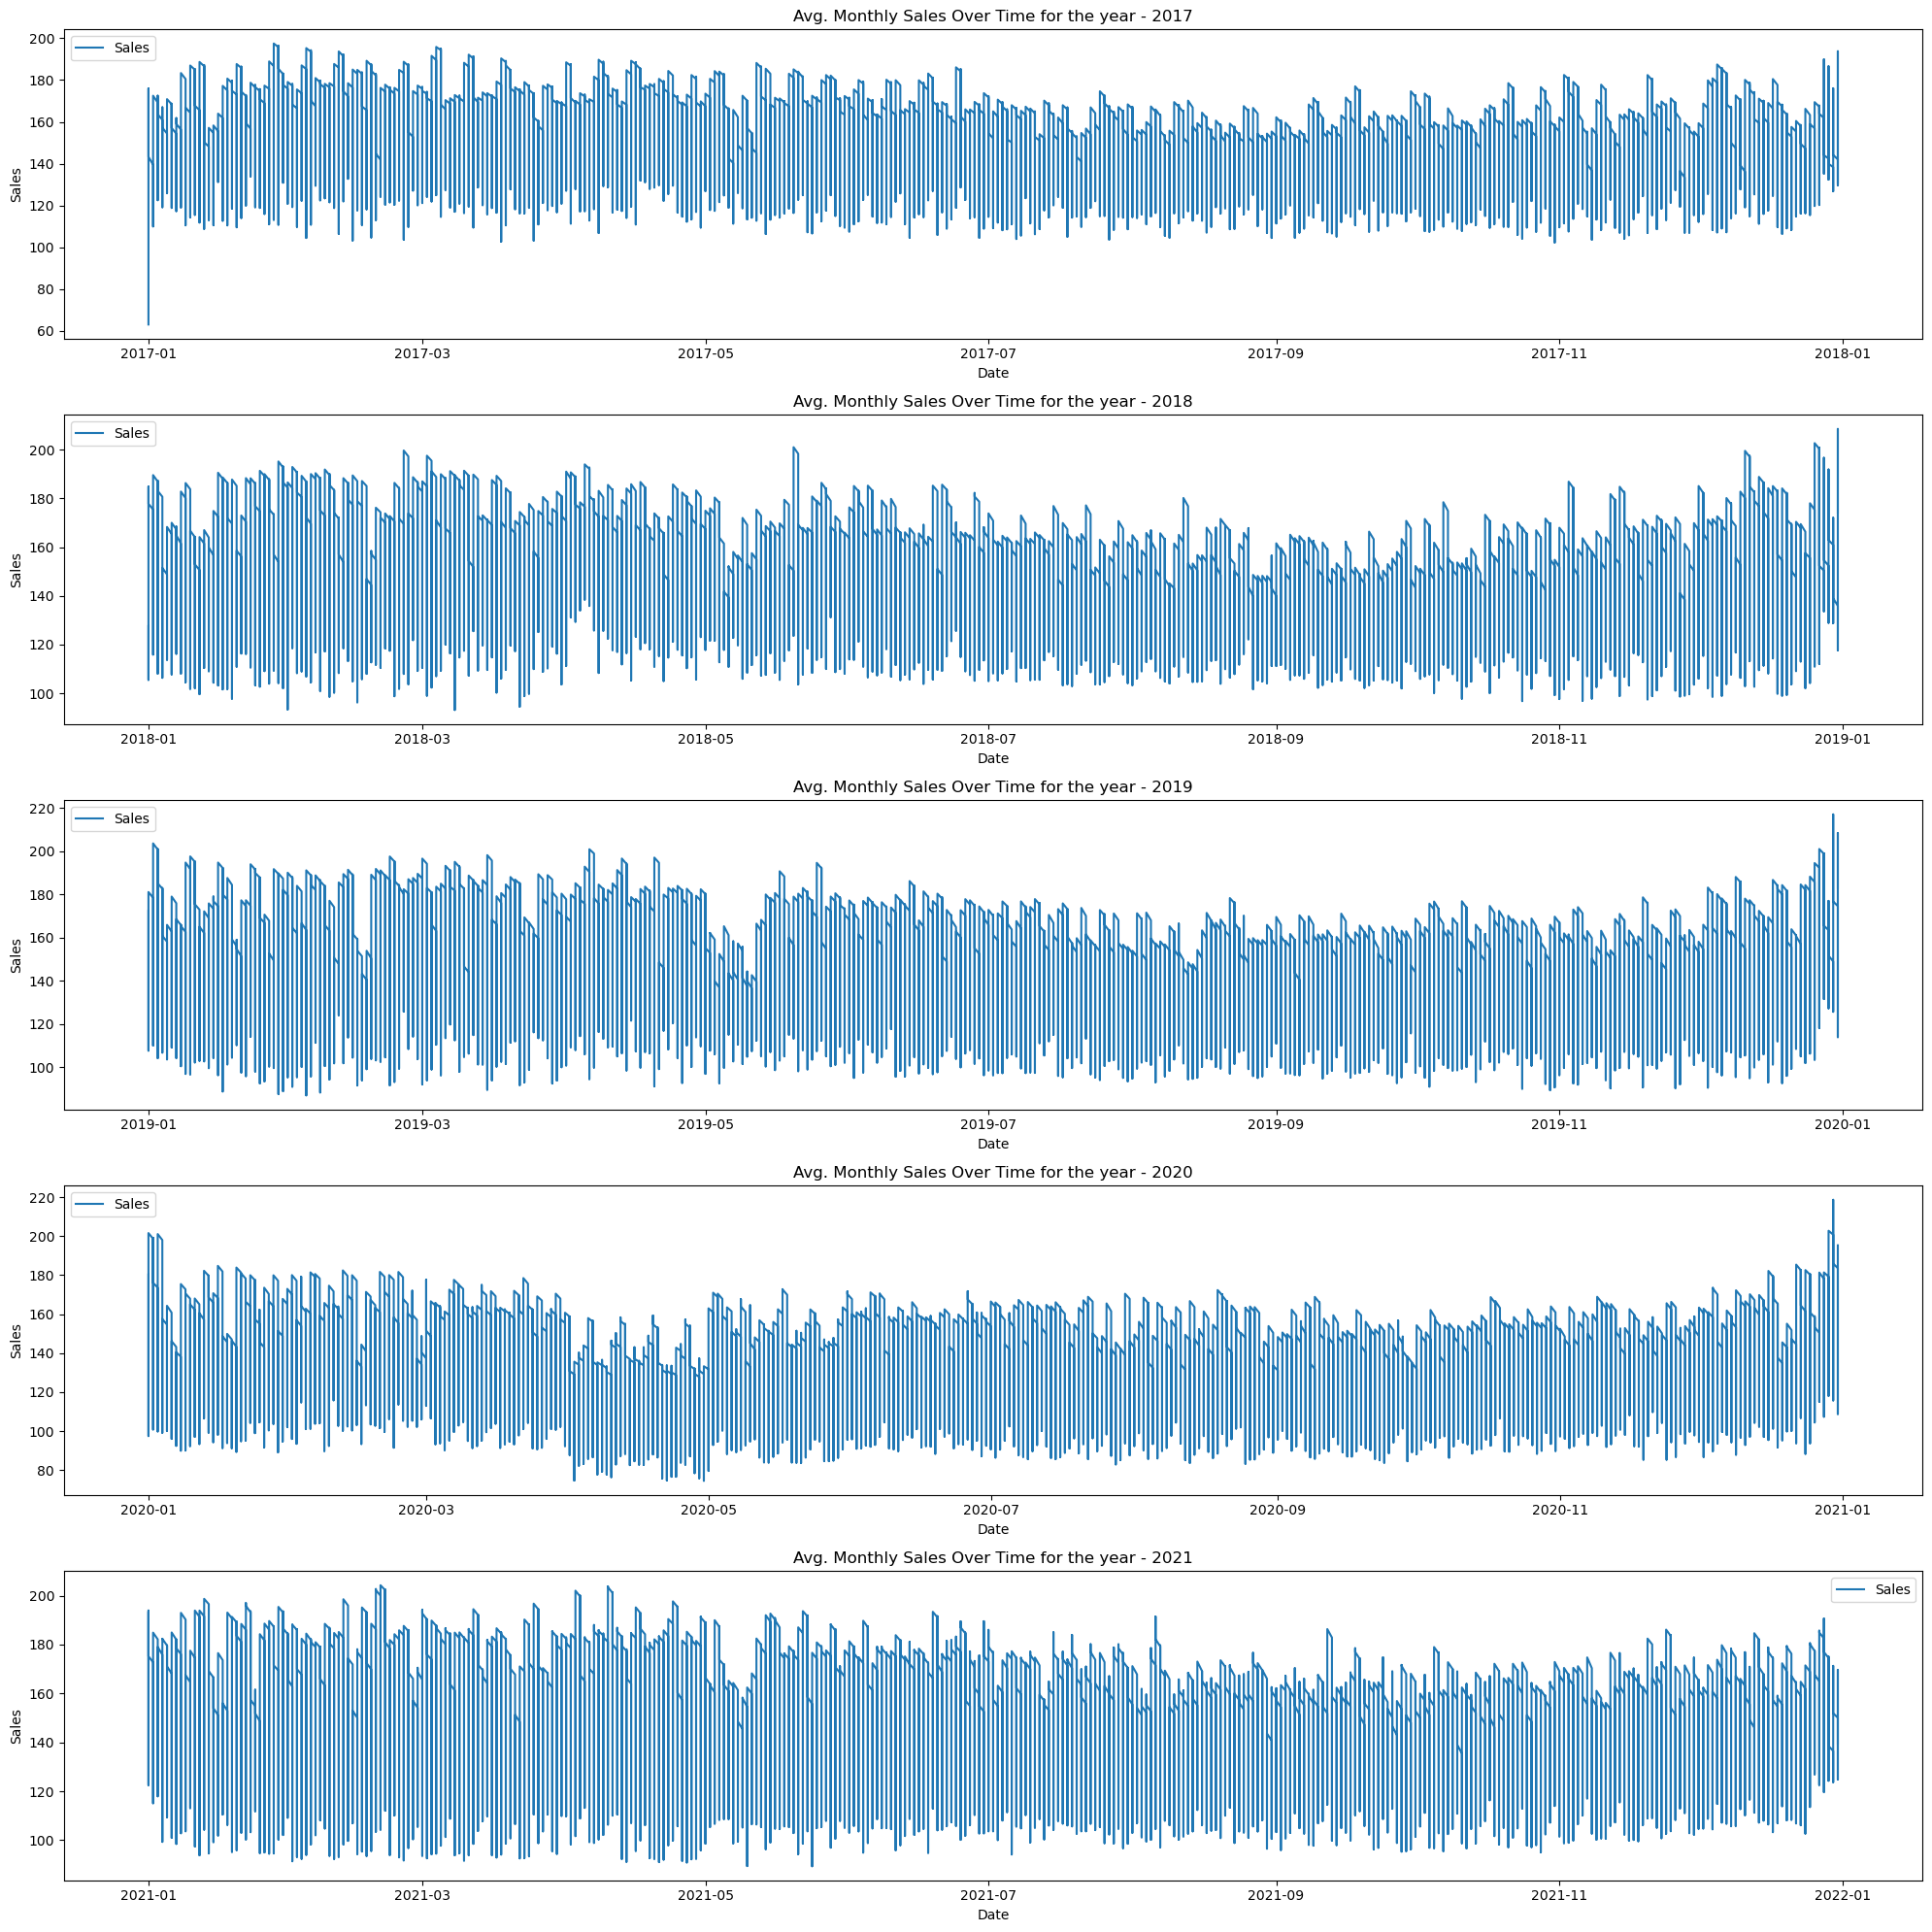

In [11]:
# VISUALIZING AVG. MONTHLY SALES FOR DIFFERENT YEARS

yearly = data.groupby('Year')['Avg_Monthly_Sale']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))

for i, yr in enumerate([2017, 2018, 2019, 2020, 2021]):
    ax = axes[i]
    ax.plot(yearly.get_group(yr), label='Sales')
    ax.set_title(f'Avg. Monthly Sales Over Time for the year - {yr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.legend()

plt.tight_layout()

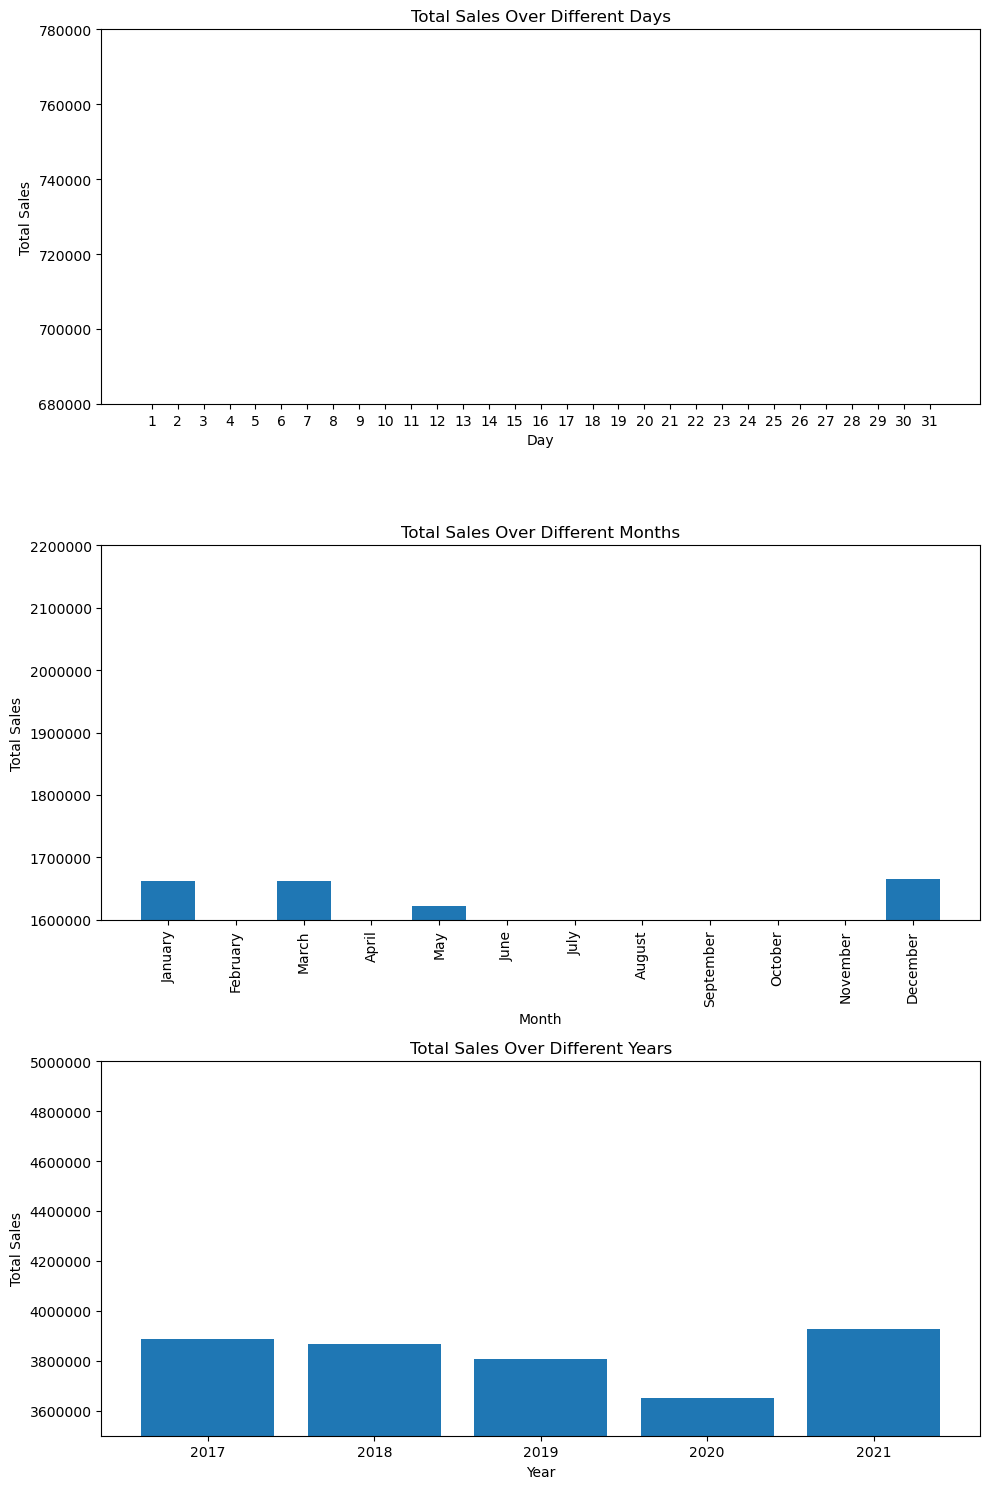

In [12]:
# VISUALIZING TOTAL SALES OVER DAYS, MONTHS AND YEARS

import calendar

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

ax1 = axes[0]
days = sorted(data['Day'].unique())
ax1.bar(days, data.groupby('Day')['num_sold'].sum())
ax1.set_title('Total Sales Over Different Days')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Sales')
ax1.set_xticks(days)
ax1.set_ylim([680000, 780000])

ax2 = axes[1]
months = [calendar.month_name[i] for i in range(1, 13)]
ax2.bar(range(1, 13), data.groupby('Month')['num_sold'].sum())
ax2.set_title('Total Sales Over Different Months')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(months, rotation='vertical')
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylim([1600000, 2200000])

ax3 = axes[2]
ax3.bar(data['Year'].unique(), data.groupby('Year')['num_sold'].sum())
ax3.set_title('Total Sales Over Different Years')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Sales')
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_ylim([3500000, 5000000])

plt.tight_layout()
plt.show()

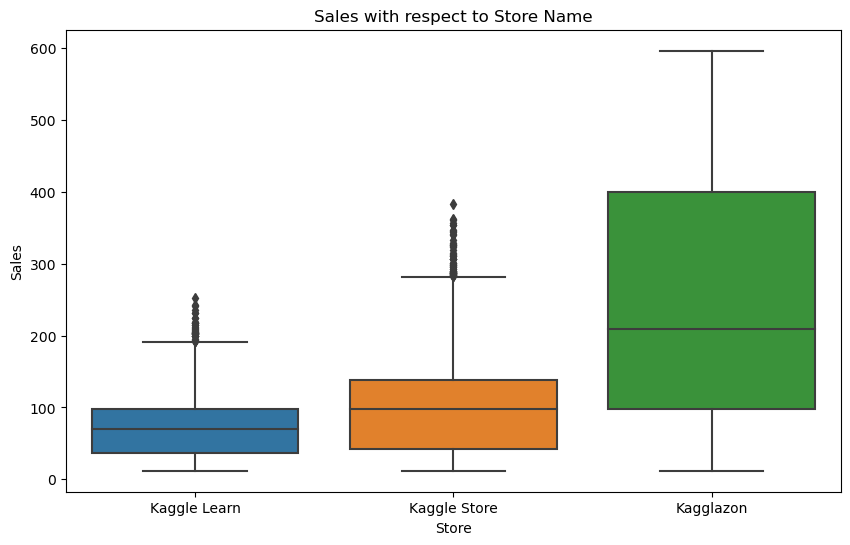

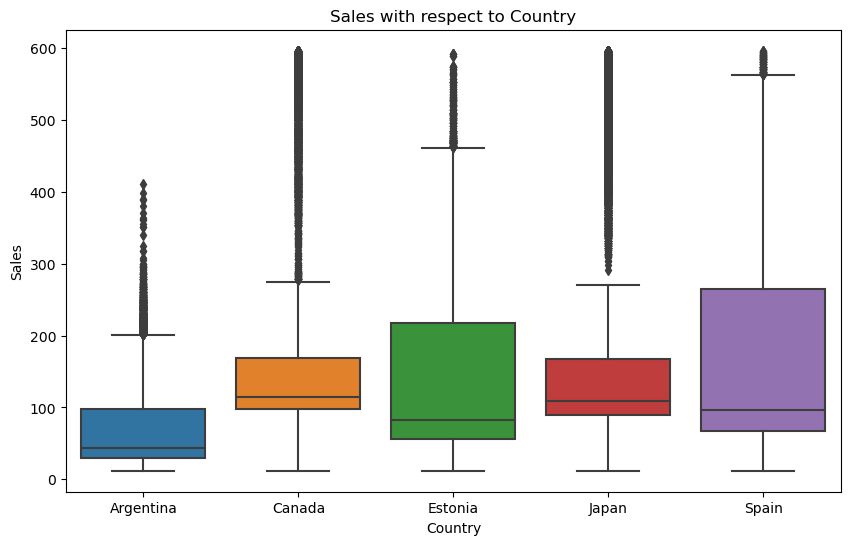

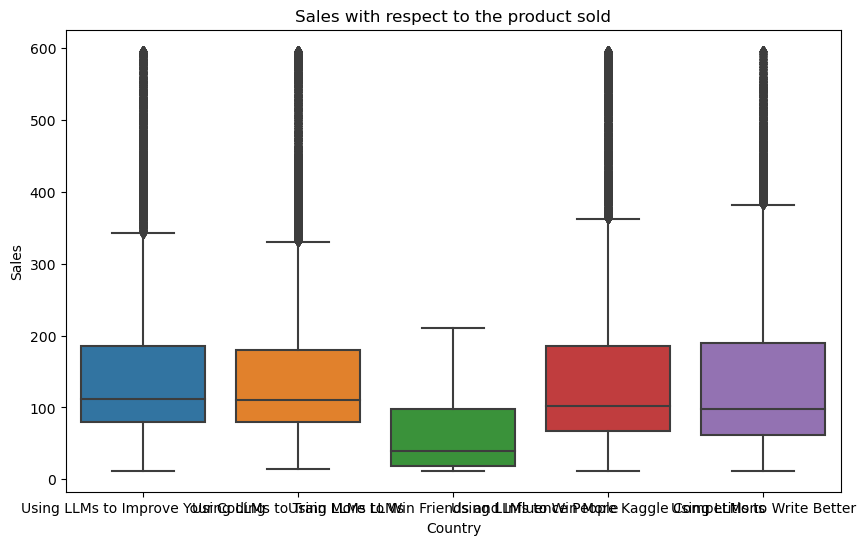

In [13]:
# CREATING BOXPLOTS TO COMPARE SALES W.R.T STORE AND COUNTRY

plt.figure(figsize=(10, 6))
sns.boxplot(x='store', y='num_sold', data= data)
plt.title('Sales with respect to Store Name')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='num_sold', data= data)
plt.title('Sales with respect to Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='num_sold', data= data)
plt.title('Sales with respect to the product sold')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

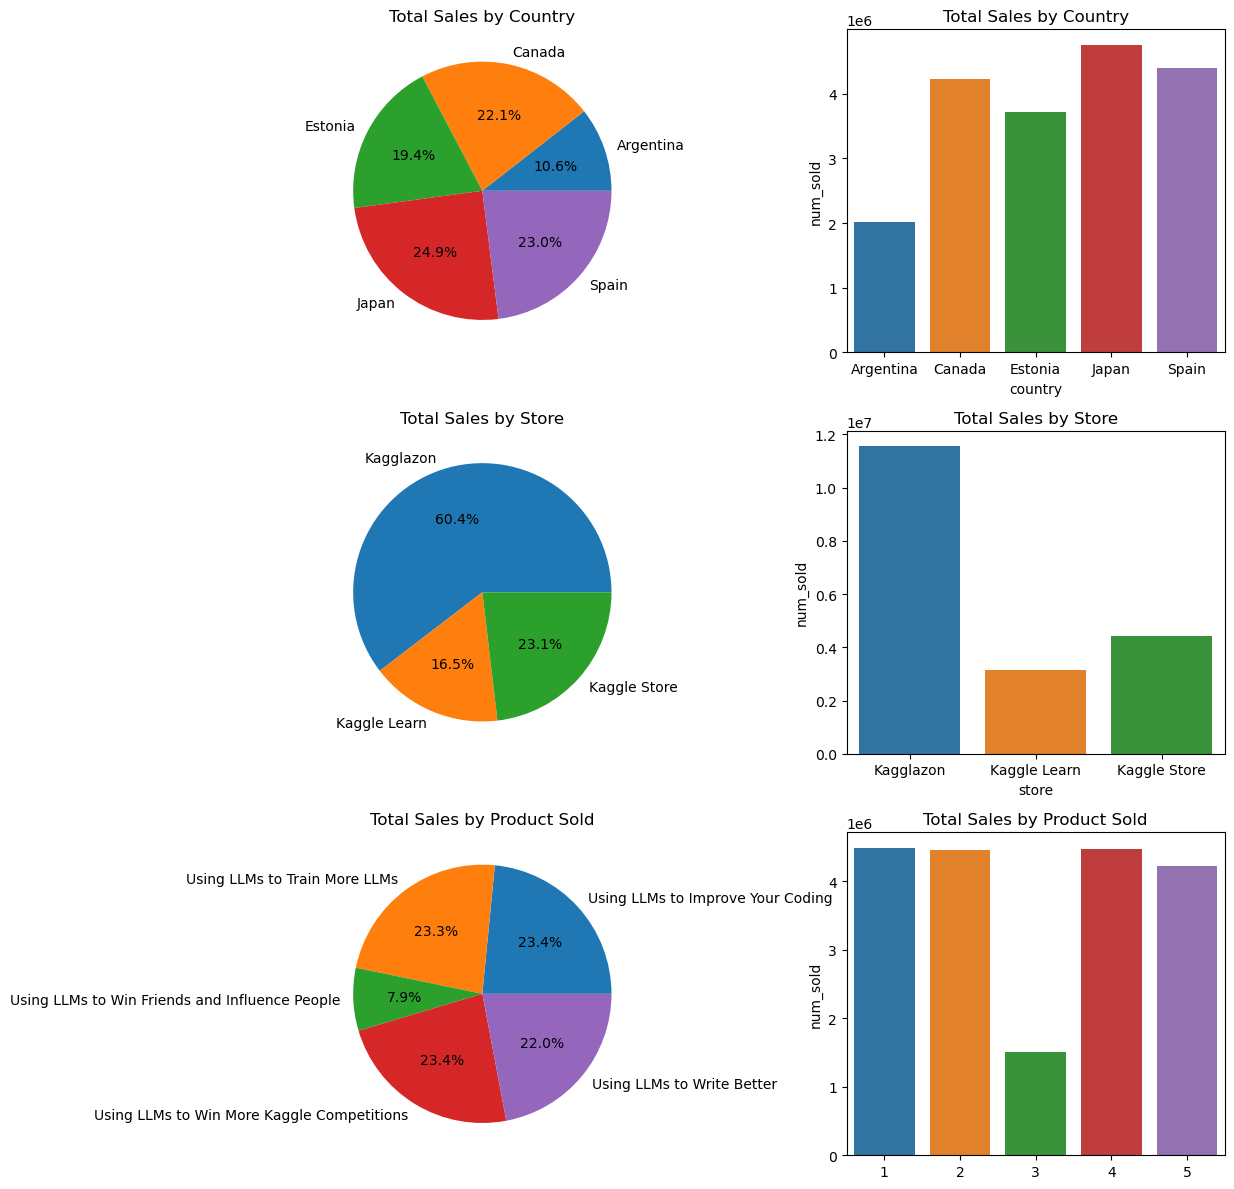

In [14]:
import seaborn as sns

total_sales_country = data.groupby('country')['num_sold'].sum()
total_sales_store = data.groupby('store')['num_sold'].sum()
total_sales_product = data.groupby('product')['num_sold'].sum()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].set_title('Total Sales by Country')
axes[0, 0].pie(total_sales_country, labels=total_sales_country.index, autopct='%1.1f%%')
axes[0, 1].set_title('Total Sales by Country')
sns.barplot(x=total_sales_country.index, y=total_sales_country, ax=axes[0, 1])

axes[1, 0].set_title('Total Sales by Store')
axes[1, 0].pie(total_sales_store, labels=total_sales_store.index, autopct='%1.1f%%')
axes[1, 1].set_title('Total Sales by Store')
sns.barplot(x=total_sales_store.index, y=total_sales_store, ax=axes[1, 1])

axes[2, 0].set_title('Total Sales by Product Sold')
axes[2, 0].pie(total_sales_product, labels=total_sales_product.index, autopct='%1.1f%%')
axes[2, 1].set_title('Total Sales by Product Sold')
sns.barplot(x=[1,2,3,4,5], y=total_sales_product, ax=axes[2, 1])

plt.tight_layout()
plt.show()

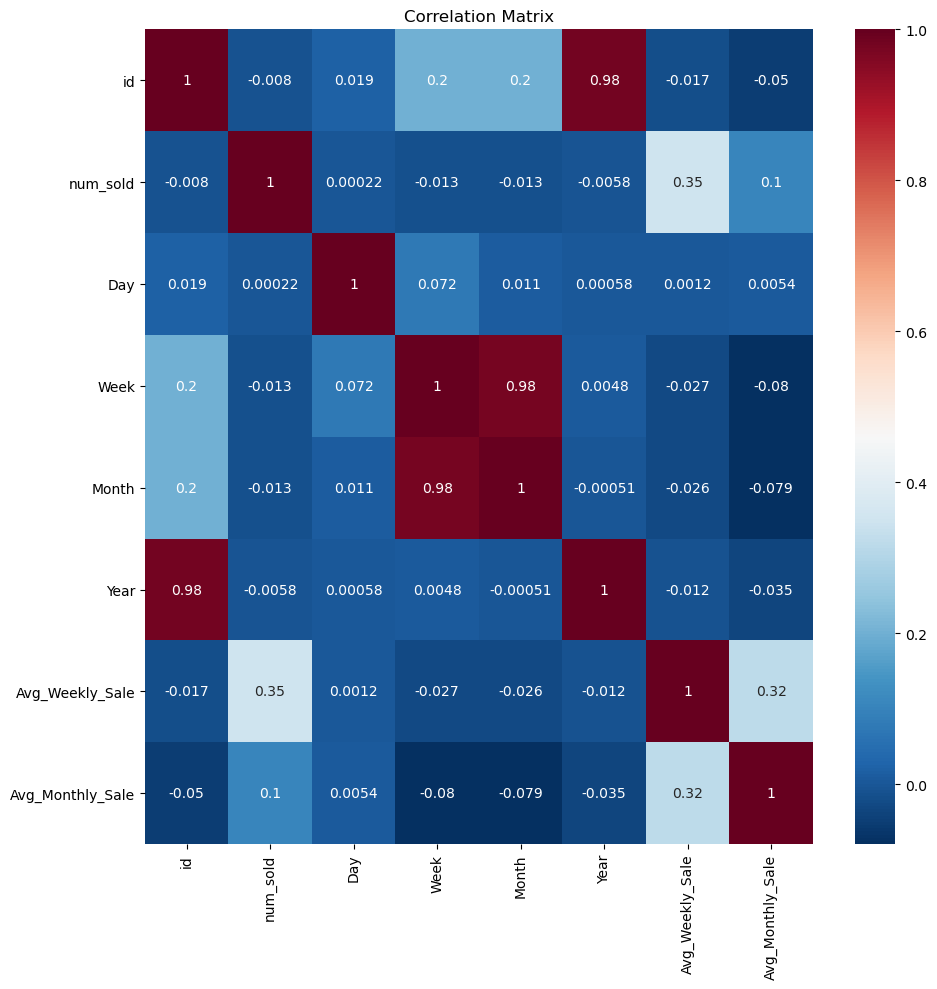

In [15]:
# CREATING A CORRELATION MATRIX TO ANALYSE CORRELATIONS WITHIN VARIABLES

corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

**FEATURE ENGINEERING AND SELECTION**

In [16]:
# FEATURE ENGINEERING SOME NEW FEATURES TO CAPTURE SEASONALITY

data['Quarter'] = data['Month'].apply(lambda x: (x-1)//3 + 1)
data['Day_of_Year'] = data['Month'] * 30 + data['Day']
data['Weekday'] = pd.to_datetime(data['Day'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Year'].astype(str)).dt.day_name()
data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

data.head()

,id,country,store,product,num_sold,Day,Week,Month,Year,Avg_Weekly_Sale,Avg_Monthly_Sale,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,1,52,1,2017,63.000000,63.000000,1,31,Sunday,1
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0,1,52,1,2017,64.500000,64.500000,1,31,Sunday,1
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,98.0,1,52,1,2017,75.666667,75.666667,1,31,Sunday,1
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,1,52,1,2017,71.500000,71.500000,1,31,Sunday,1
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0,1,52,1,2017,67.000000,67.000000,1,31,Sunday,1


In [17]:
# SEPERATING OUT THE DATA INTO TARGET AND FEATURES

x = data.drop(['num_sold'],axis=1)
y = data['num_sold']

x.head()

,id,country,store,product,Day,Week,Month,Year,Avg_Weekly_Sale,Avg_Monthly_Sale,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,52,1,2017,63.000000,63.000000,1,31,Sunday,1
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,1,52,1,2017,64.500000,64.500000,1,31,Sunday,1
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,52,1,2017,75.666667,75.666667,1,31,Sunday,1
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,52,1,2017,71.500000,71.500000,1,31,Sunday,1
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,1,52,1,2017,67.000000,67.000000,1,31,Sunday,1


In [18]:
# DROPPING AVG WEEKLY AND AVG. MONTHLY SALES COLUMN AS THEY WERE ONLY USED FOR ANALYSIS AND CANNOT BE AVAILABLE IN UNSEEN DATA

x = x.drop(['Avg_Weekly_Sale', 'Avg_Monthly_Sale'], axis = 1)
x.head()

,id,country,store,product,Day,Week,Month,Year,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,52,1,2017,1,31,Sunday,1
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,1,52,1,2017,1,31,Sunday,1
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,52,1,2017,1,31,Sunday,1
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,52,1,2017,1,31,Sunday,1
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,1,52,1,2017,1,31,Sunday,1


In [19]:
# LABEL ENCODING THE COUNTRY, PRODUCT AND STORE COLUMN (CATEGORICAL COLS)

from sklearn.preprocessing import LabelEncoder

def encode(data, cols):
    for col in cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

categ_cols = ['product', 'store','country', 'Weekday']
x = encode(x, categ_cols)
x.head()

,id,country,store,product,Day,Week,Month,Year,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,
2017-01-01,0,0,1,0,1,52,1,2017,1,31,3,1
2017-01-01,1,0,1,1,1,52,1,2017,1,31,3,1
2017-01-01,2,0,1,2,1,52,1,2017,1,31,3,1
2017-01-01,3,0,1,3,1,52,1,2017,1,31,3,1
2017-01-01,4,0,1,4,1,52,1,2017,1,31,3,1


In [20]:
# GETTING BEST FEATURES BASED ON RIDGE REGRESSION

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x, y)
feat_coef = pd.Series(ridge.coef_, index=x.columns)
sort_coef = feat_coef.abs().sort_values(ascending=False)
best_feats_ridge = sort_coef.index[:7]  

best_feats_ridge

Index(['Year', 'store', 'country', 'Quarter', 'product', 'Day_of_Year',
       'Is_Weekend'],
      dtype='object')

In [21]:
# GETTING BEST FEATURES BASED ON LASSO REGRESSION

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x, y)
l_feat_coef = pd.Series(lasso.coef_, index=x.columns)
l_sort_coef = l_feat_coef.abs().sort_values(ascending=False)
best_feats_lasso = sort_coef.index[:7]  

best_feats_lasso

Index(['Year', 'store', 'country', 'Quarter', 'product', 'Day_of_Year',
       'Is_Weekend'],
      dtype='object')

In [22]:
# TAKING ONLY THE BEST FEATURES AS DECIDED BY LASSO AND RIDGE REGRESSION

x = x[['store', 'country', 'product', 'Is_Weekend', 'Quarter', 'Year','Weekday']]
x.head()

,store,country,product,Is_Weekend,Quarter,Year,Weekday
Date,,,,,,,
2017-01-01,1,0,0,1,1,2017,3
2017-01-01,1,0,1,1,1,2017,3
2017-01-01,1,0,2,1,1,2017,3
2017-01-01,1,0,3,1,1,2017,3
2017-01-01,1,0,4,1,1,2017,3


**FITTING MODELS TO FORECAST TIME SERIES**

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,store,country,product,Is_Weekend,Quarter,Year,Weekday
Date,,,,,,,
2018-08-16,0,3,0,0,3,2018,4
2019-01-30,1,1,2,0,1,2019,6
2020-06-19,2,1,0,0,2,2020,0
2019-04-22,2,3,2,0,2,2019,1
2017-01-30,2,2,2,0,1,2017,1
...,...,...,...,...,...,...,...
2021-01-10,1,1,3,0,1,2021,0
2021-05-18,0,1,4,0,2,2021,5
2020-10-14,0,2,4,0,4,2020,6


In [24]:
# FINDING BEST PARAMETERS FOR A CATBOOST MODEL

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'iterations': [500, 100], 'learning_rate': [0.05, 0.1]}

catboost_model = CatBoostRegressor(loss_function='MAE')
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=2)

grid_search.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=100, verbose=False)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'iterations': 500, 'learning_rate': 0.1}
Best score: 0.7863699290216681


In [25]:
# FITTING A CATBOOST MODEL TO OUR DATA ACCORDING TO THE BEST HYPERPARAMETERS FOUND

best_params = grid_search.best_params_

catboost_model = CatBoostRegressor(loss_function='MAE', random_seed=42, **best_params)
catboost_model.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=100)

0:	learn: 77.7779553	test: 77.4892834	best: 77.4892834 (0)	total: 13.5ms	remaining: 6.73s
1:	learn: 72.3379002	test: 72.1092793	best: 72.1092793 (1)	total: 26.5ms	remaining: 6.59s
2:	learn: 67.4898427	test: 67.3117864	best: 67.3117864 (2)	total: 39ms	remaining: 6.45s
3:	learn: 63.1699557	test: 63.0591258	best: 63.0591258 (3)	total: 50.6ms	remaining: 6.27s
4:	learn: 59.2955237	test: 59.2302219	best: 59.2302219 (4)	total: 62ms	remaining: 6.14s
5:	learn: 55.8580410	test: 55.8561570	best: 55.8561570 (5)	total: 73.2ms	remaining: 6.03s
6:	learn: 52.8301221	test: 52.8620748	best: 52.8620748 (6)	total: 86.6ms	remaining: 6.1s
7:	learn: 50.1950275	test: 50.2618834	best: 50.2618834 (7)	total: 97.9ms	remaining: 6.02s
8:	learn: 47.9189682	test: 48.0220295	best: 48.0220295 (8)	total: 109ms	remaining: 5.97s
9:	learn: 45.9689551	test: 46.1010396	best: 46.1010396 (9)	total: 122ms	remaining: 5.96s
10:	learn: 44.3048131	test: 44.4658408	best: 44.4658408 (10)	total: 134ms	remaining: 5.95s
11:	learn: 42.88

In [28]:
# FITTING AN LSTM MODEL TO OUR DATA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Ensure the input data is of type float32
x_train_reshaped = np.expand_dims(x_train.astype('float32'), axis=1)

lstm_model = Sequential()
#lstm_model.add(LSTM(128, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True))
lstm_model.add(LSTM(128, activation='relu', return_sequences=True))
lstm_model.add(LSTM(64, activation='relu', return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32)

Epoch 1/10
3424/3424 [==============================] - 14s 3ms/step - loss: 87.6816
Epoch 2/10
3424/3424 [==============================] - 11s 3ms/step - loss: 86.2789
Epoch 3/10
3424/3424 [==============================] - 11s 3ms/step - loss: 84.4362
Epoch 4/10
3424/3424 [==============================] - 11s 3ms/step - loss: 83.4262
Epoch 5/10
3424/3424 [==============================] - 11s 3ms/step - loss: 83.4407
Epoch 6/10
3424/3424 [==============================] - 10s 3ms/step - loss: 73.7865
Epoch 7/10
3424/3424 [==============================] - 10s 3ms/step - loss: 70.9871
Epoch 8/10
3424/3424 [==============================] - 10s 3ms/step - loss: 70.0890
Epoch 9/10
3424/3424 [==============================] - 10s 3ms/step - loss: 70.2422
Epoch 10/10
3424/3424 [==============================] - 10s 3ms/step - loss: 69.8950


In [29]:
# MAKING PREDICTIONS WITH OUT TRAINED MODELS

catb_preds = catboost_model.predict(x_test)
lstm_preds = lstm_model.predict(np.expand_dims(x_test, axis=1))

In [30]:
# EVALUATION OF CATBOOST MODEL

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

catb_r2 = r2_score(y_test, catb_preds)
catb_mae = mean_absolute_error(y_test, catb_preds)
catb_rmse = np.sqrt(mean_squared_error(y_test, catb_preds))

print("R2 score of Catboost model is:", catb_r2)
print("MAE score of Catboost model is:", catb_mae)
print("RMSE score of Catboost model is:", catb_rmse)

R2 score of Catboost model is: 0.7764800775890872
MAE score of Catboost model is: 21.817526372839456
RMSE score of Catboost model is: 63.00839049349166


In [31]:
# EVALUATION OF LSTM MODEL

lstm_r2 = r2_score(y_test, lstm_preds)
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))

print("R2 score of LSTM model is:", lstm_r2)
print("MAE score of LSTM model is:", lstm_mae)
print("RMSE score of LSTM model is:", lstm_rmse)

R2 score of LSTM model is: 0.44285417185023535
MAE score of LSTM model is: 66.59164297988964
RMSE score of LSTM model is: 99.47746474915222


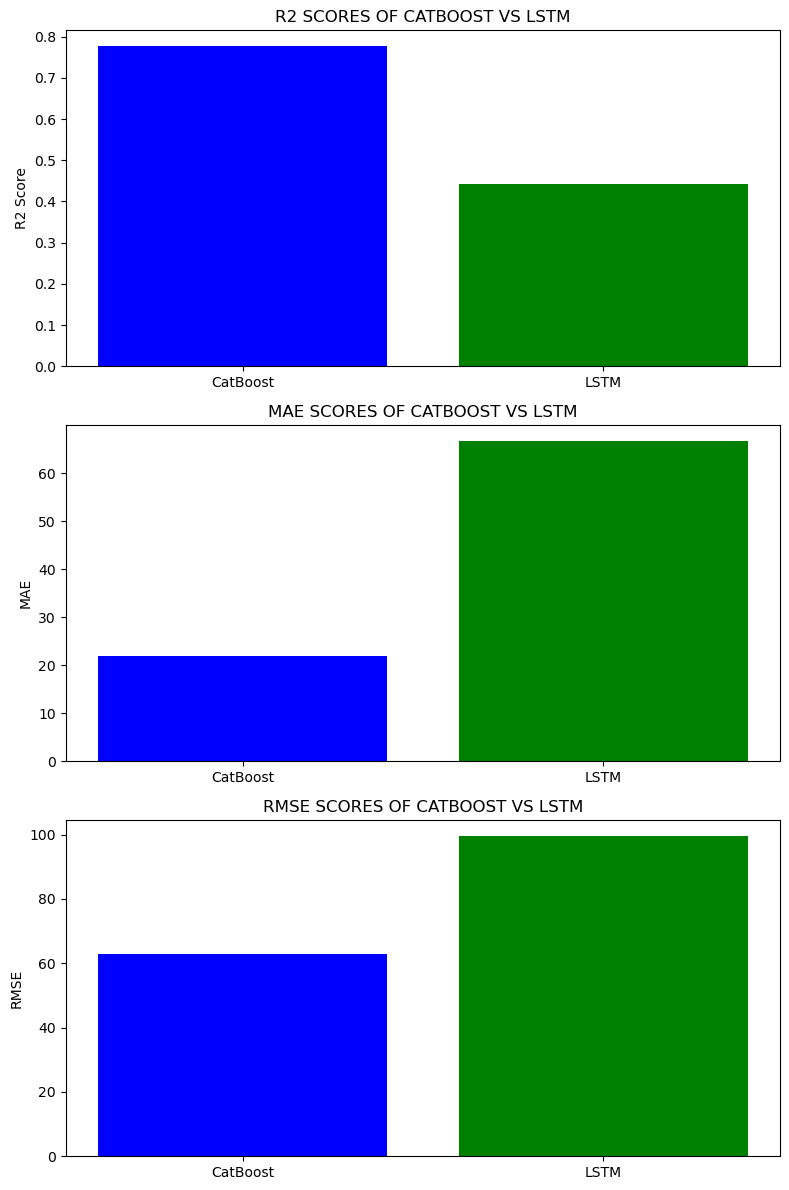

CatBoost model performs better based on R2, MAE, and RMSE scores.


In [33]:
# COMPARING THE TWO MODELS

r2_scores = [catb_r2, lstm_r2]
mae_scores = [catb_mae, lstm_mae]
rmse_scores = [catb_rmse, lstm_rmse]
labels = ['CatBoost', 'LSTM']

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].bar(labels, r2_scores, color=['blue', 'green'])
axes[0].set_ylabel('R2 Score')
axes[0].set_title('R2 SCORES OF CATBOOST VS LSTM')

axes[1].bar(labels, mae_scores, color=['blue', 'green'])
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE SCORES OF CATBOOST VS LSTM')

axes[2].bar(labels, rmse_scores, color=['blue', 'green'])
axes[2].set_ylabel('RMSE')
axes[2].set_title('RMSE SCORES OF CATBOOST VS LSTM')

plt.tight_layout()
plt.show()
# Analyzing the better model based on the generated graph
if catb_r2 > lstm_r2 and catb_mae < lstm_mae and catb_rmse < lstm_rmse:
    print("CatBoost model performs better based on R2, MAE, and RMSE scores.")
else:
    print("LSTM model performs better based on R2, MAE, and RMSE scores.")